In [144]:
from Yenet import Yenet
from PIL import Image
from torchvision import transforms as trn
from torch.autograd import Variable as V
import os
import numpy as np

In [145]:
def returnTF():
        # load the image transformer
        tf = trn.Compose([
        trn.Resize((5,5)),
        trn.ToTensor(),
        trn.Normalize([0.485], [0.229])
        ])
        return tf

In [146]:
net = Yenet()

In [147]:
net

Yenet(
  (tlu): Hardtanh(min_val=-3.0, max_val=3.0)
  (conv2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(30, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv6): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv7): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv8): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv9): Conv2d(16, 16, kernel_size=(3, 3), stride=(3, 3))
  (fc): Linear(in_features=144, out_features=2, bias=True)
)

In [148]:
# Image.open reads the image in RGB
image = trn.functional.to_grayscale(Image.open('../steg_images/_test/airplane_0582.jpg'), num_output_channels=1)

In [149]:
tf = returnTF()

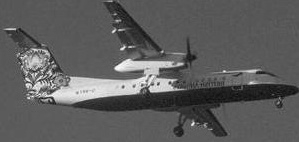

In [150]:
image

In [151]:
test_images = os.listdir('../steg_images/_test')

In [152]:
from torch.utils.data import Dataset, DataLoader
import torch

class ImagesDataset(Dataset):
    """Feature loader."""

    def __init__(self, images, labels, tf=None):
        self.images = images
        self.labels = labels
        self.tf = tf

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Image.open reads the image in RGB
        image = trn.functional.to_grayscale(Image.open('../steg_images/_test/' + self.images[idx]), num_output_channels=1)
        label = self.labels[idx]
        sample = {'image': self.tf(image), 'label': label}

        return sample

In [153]:
testloader = torch.utils.data.DataLoader(ImagesDataset(test_images, [1]*len(test_images), tf), batch_size=30, shuffle=True, num_workers=4)

In [154]:
testloader

In [155]:
for i_batch, sample_batched in enumerate(testloader):
    if i_batch == 1:
        break
    print(i_batch, sample_batched['image'].size(),
          sample_batched['label'].size())

0 torch.Size([30, 1, 5, 5]) torch.Size([30])


In [156]:
for i, data in enumerate(testloader):
    print('Batch {0} / {1}'.format(i+1, len(testloader)))
    inputs = data['image']
    input_var = V(inputs, volatile=False)
    outputs = net.forward(input_var)
    #pred = outputs.data.max(1)[1]  # get the index of the max log-probability
    #print("Pred: " + pred)
    break

Batch 1 / 32


RuntimeError: std::exception